# **AP155 Lab Assignment** 
## Module 7: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 30 and 70 points, respectively).

_Due Date_: **5PM of January 7 (Fri)**


### Student Information 

_Full Name (Last Name, First Name)_: Hernandez, Hans Emmanuel\
_Student No._: 2020-11387\
_Section_: THU-HX-4

### Submission Information

_Date and Time Submitted (most recent upload)_: January 11, 2023

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: HANS EMMANUEL HERNANDEZ** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (30 pts.; 50/50 for code & discussion) 
**Integration with Monte Carlo methods**

_Refer to Exercise 10.5 in the Newman text_ 

1. Evaluate this integral 
$$ I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] {\rm d}x.$$
using the "hit-or-miss" Monte Carlo method of Section 10.2 with 10,000 points. Also evaluate the error on your estimate. *(15 pts.)*

2. Now estimate the integral again using the mean value method with 10,000 points. Also evaluate the error. *(15 pts.)*

In [79]:
import numpy
from numpy import *
import matplotlib.pyplot
from matplotlib.pyplot import *
from random import random, randrange

In [77]:
# Start with hit-or-miss method
# Define the given function we wish to integrate
def f(x):
  return (sin(1/(x*(2-x))))**2

# Define variables
N = 10000    # set the number of random sample points to be generated
k = 0        # set the initial number of generated points that fall under the curve
A = 2        # area of bounding rectangle (2 length units X 1 width unit)

for i in range(N):     # loops N times to generate N number of points
  x = 2*random()       # generates randomized value of x from 0 to 2 (domain of integration)
  y = random()         # generates randomized value of y from 0 to 1 (range of integration)
  if y < f(x):         # checks if generated point is below the curve
    k += 1             # tracks the number of points that fell below the curve
                        
# Set the integral estimate formula
I = A*k/N                               # area of the curve times the fraction of points that fell below the curve
error = (sqrt((I*(A-I))/N))*100         # error formula which gives the expected variation in the value of k
print(f'The integral estimate using hit-or-miss method: I = {I} with error = {error}%')

The integral estimate using hit-or-miss method: I = 1.4548 with error = 0.8905935997973485%


In [74]:
# Next, we do the mean value method
# Define variables
N = 10000          # set the number of random sample points to be generated
a = 0              # lower bound of integration
b = 2              # upper bound of integration

# Initialize summations
sum_0 = 0          # summation for expectation value of f(x)
sum_1 = 0          # summation for expectation value of (f(x))^2
# We construct a loop that solves for the expectation value of f(x)
for i in range(N):          # loops N times to generate N number of points
    x = 2*random()          # generates randomized value of x from 0 to 2 (domain of integration)
    sum_0 += f(x)           # solves for f(x_ith element) then adds it back to the 1st summation
    sum_1 += (f(x))**2      # solves for f^2(x_ith element) then adds it back to the 2nd summation

# Complete the formulas for the expectation values
f_0 = sum_0/N       # <f(x)>
f_1 = sum_1/N       # <f^2(x)>

# We solve for the variance
varf = f_1 - (f_0)**2      # gives the variance on every single f(x_ith value)

# Set the integral estimate formula
I = (b-a)*f_0                                 # this is basically the mean (sum/N) projected between a and b
error = (b-a)*(sqrt(varf)/sqrt(N))*100        # error formula
print(f'The integral estimate using mean value method: I = {I} with error = {error}%' )

The integral estimate using mean value method: I = 1.4505362878866732 with error = 0.5236872530386937%


**As we can see from the results above, the mean value method resulted to an integral estimate with a more reduced percentage error. Both of their errors reduce to a rate of N^-1/2 but since the mean value method has a smaller leading constant with (b-a), it is always going to be more accurate than the hit-or-miss method.**

### PROBLEM 2 (70 pts.; 50/50 for code & discussion) 
**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(20 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(20 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(20 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(10 pts.)*

In [162]:
# Define variables
J = 1                # positive interaction constant
T = 1                # temperature
kb = 1               # Boltzmann constant

# Define function to get the total energy
def energy_ising(lattice):       # lattice parameter
    n, m = lattice.shape         # assign dimensions of the lattice to local variables
    s = 0                        # initialize the summation
    
# Start at topleft element of the lattice and then go down /or to the right to sum the contributions of the spin vectors
    for i in range(n):
      for j in range(m):
        if i == n-1 and j == m-1:             # checks if i,j is in the bottomright corner
          s += 0                              # this contributes nothing new to the summation since it was already accounted for by the previous element in the lattice 
        elif i == n-1:                        # checks if i has reached the last column                                       
          s += lattice[i,j]*(lattice[i,j+1])  # contribute only the cell below it since there is no more cell to the right 
        elif j == m-1:                        # checks if j has reached the last row
          s += lattice[i,j]*(lattice[i+1,j])  # contribute only the cell to its right since there is no more cell below
        else:                                 # checks if cell is anywhere else in the middle of the lattice
          s += lattice[i,j]*(lattice[i+1,j] + lattice[i,j+1])    # contribute the magnitudes from below and to its right
# The total magnitude is multiplied to the positive interaction constant J which yields the total energy of the system
    E = -J*s    # total energy equation
    return E    

# Define a function that updates the lattice for the spin acceptance/rejection decision
def renew_lattice(lattice):
    E_i = energy_ising(lattice)    # apply energy function to solve for the energy of the current lattice
# Next, we choose a random cell from the lattice
    x = randrange(N)               # random value from 0 to N-1
    y = randrange(N)               # random value from 0 to N-1
# Create a copy of the original lattice then store it in a variable
    lattice_1 = copy(lattice)      # returns array copy
    lattice_1[x,y] *= -1           # invert the spin of the randomly chosen cell
# Solve for the new energy of the newly constructed lattice
    E_f = energy_ising(lattice_1)
# Solve for the change in energy
    dE = E_f - E_i                 

# Loop on acceptance/rejection decision
    if dE <= E_i:                  # checks if new energy is less than or equal to the initial energy
        lattice = lattice_1        # keep the new lattice
    else:                          # if new energy increased, proceed with the formula
        P = exp(-dE/(kb*T))        # acceptance probability formula (since dE > 0, this will be [0,1))
        r = random()               # random value from 0 to 1
        if r <= P:                 # checks if random number is less than the acceptance probability
            lattice = lattice_1    # store the flipped spin lattice as the accepted lattice

    return lattice                 # returns accepted lattice

**Note that the degree of alignment of the many individual dipoles in our lattice determines the overall magnetization of the system.**

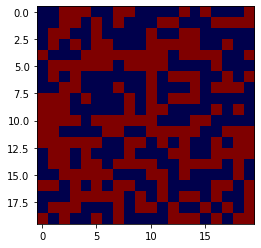

In [176]:
# Next, we define our 20x20 lattice for the next parts of our code
N = 20    # dimension

# Create a NxN lattice with randomized spin up and down elements
lattice = np.random.choice([-1,1], size = [N,N])    # since the distribution is roughly 50/50, this will result to an approximately 0 magnetization
imshow(lattice, cmap = 'seismic')                   # show image of plot

In [158]:
# Define function to get the magnetization of the lattice
def magnet_ising(lattice):
    n, m = lattice.shape           # assign dimensions of the lattice to local variables
    mag = 0                        # initialize magnetization value
    for i in range(n):             # loops through ith elements
      for j in range(m):           # loops through jth elements
        mag += lattice[i,j]        # total magnetization is equal to the sum of all elements in the lattice
            
    return mag                     # returns magnetization value

# Define the number of monte carlo steps
count = 1000000                   
mag_list = []                      # initialize list of solved magnetization per lattice iteration
for k in range(count):
  lattice = renew_lattice(lattice)         # updates lattice for every count
  mag_list.append(magnet_ising(lattice))   # appends the solved magnetization for every updated lattice

**After starting the lattice as some random arrangement of dipoles, we have considered flipping one of its spins. Depending on the Markov Chain Monte Carlo simulation, that flip was either rejected or accepted. After this has been done for many times, our system evolved to some steady state whose average properties are our interest.**

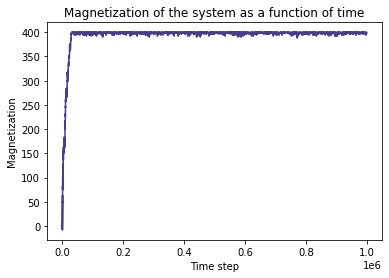

In [169]:
# Plot the total magnetization over time
time = list(range(count))          # x-axis
fig, ax = subplots()               # initialize subplots
ax.plot(time, mag_list, color='darkslateblue')                  # x-axis: time, y-axis: magnetization
xlabel('Time step')                # set axis label
ylabel('Magnetization')            # set axis label
title('Magnetization of the system as a function of time')      # set title
show()                             # show plot

**After running the program several times, the magnetization of the system eventually reached either a positive or negative value of 400. This suggests that when a system has an overall charge, it is more likely to increase the magnitude of that charge than to decrease it, implying ferromagnetic interaction where the material will magnetize given a chance. Thus, resulting to runs where our magnetization is always either positive or negative 400.**